In [12]:
import cv2
import itertools
import numpy as np
from matplotlib import pyplot as plt

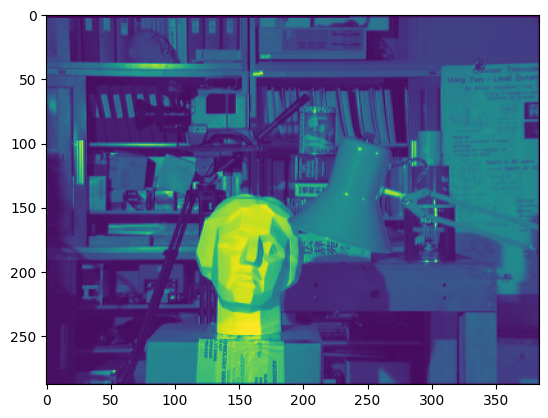

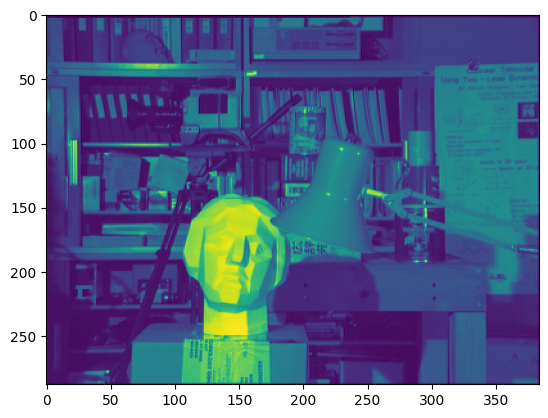

In [82]:
# Loading the left / right images

imgL = cv2.imread('tsukuba_l.png', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('tsukuba_r.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(imgL)
plt.figure()
plt.imshow(imgR)

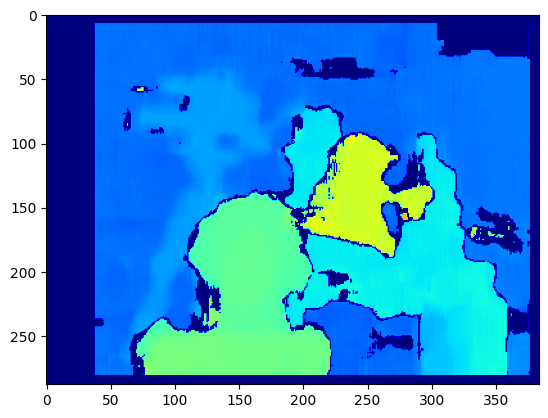

In [81]:
# Disparity estimation

stereo = cv2.StereoBM.create(numDisparities=32, blockSize=15)
disparity = stereo.compute(imgL,imgR)

cv2.imwrite('diparity-output.png', disparity)

plt.figure()
plt.imshow(disparity,cmap='jet')

nrows, ncols = disparity.shape
disparity = disparity.reshape(-1, nrows * ncols)

In [79]:
# filtering invalid disparities (-1)
# setting up row, col vectors

yx = list(itertools.product(range(nrows), range(ncols)))

x, y = list(zip(*yx))
x = np.array(x).reshape(-1, nrows*ncols)
y = np.array(y).reshape(-1, nrows*ncols)

mask = disparity > 0
disparity = disparity[mask] * 0.1

x = x[mask]
y = y[mask]

In [80]:
# Converting disparities to point cloud

baseline = 0.1
focal_length = 150

zw = (baseline * focal_length) / disparity

cx = ncols / 2
cy = nrows / 2

xw = (x - cx) * zw / focal_length
yw = (y - cy) * zw / focal_length

data = np.stack([-xw, yw, zw], axis=0).T
np.savetxt('point.asc', data)